# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [131]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import seaborn as sns
from matplotlib import rcParams

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/city_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [33]:
#to look the weather api format
url = "http://api.openweathermap.org/data/2.5/weather?"
response=requests.get(url, params={'appid':weather_api_key,'q':'kathmandu','units':'imperial' })
weather=response.json()
weather

{'coord': {'lon': 85.3167, 'lat': 27.7167},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 73.62,
  'feels_like': 74.82,
  'temp_min': 73.62,
  'temp_max': 73.62,
  'pressure': 1017,
  'humidity': 88},
 'visibility': 6000,
 'wind': {'speed': 2.3, 'deg': 0},
 'clouds': {'all': 75},
 'dt': 1631768701,
 'sys': {'type': 1,
  'id': 9201,
  'country': 'NP',
  'sunrise': 1631750665,
  'sunset': 1631794986},
 'timezone': 20700,
 'id': 1283240,
 'name': 'Kathmandu',
 'cod': 200}

In [4]:
weather['sys']['sunrise']

1631750665

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [50]:
City=[]
Lat=[]
Lng=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]
for i, city in enumerate(cities):
    weather=requests.get(url, params={'appid':weather_api_key,
                                      'q':city,
                                     'units':'imperial'}).json()
    try:
        City.append(weather['name'])
        Lat.append(weather['coord']['lat'])   
        Lng.append(weather['coord']['lon'])
        Max_Temp.append(weather['main']['temp_max'])
        Humidity.append(weather['main']['humidity'])
        Cloudiness.append(weather['clouds']['all'])
        Wind_Speed.append(weather['wind']['speed'])
        Country.append(weather['sys']['country'])
        Date.append(weather['sys']['sunrise'])
        
        print(f'Processing Record of city number {i+1} of {city.title()}')
    except:
        print(f'City {i+1} not found. Skipping...')

City 1 not found. Skipping...
Processing Record of city number 2 of Severo-Kurilsk
Processing Record of city number 3 of Hobart
Processing Record of city number 4 of Shakawe
Processing Record of city number 5 of Mataura
Processing Record of city number 6 of Albany
Processing Record of city number 7 of Tuatapere
Processing Record of city number 8 of New Norfolk
Processing Record of city number 9 of Namibe
Processing Record of city number 10 of Mitu
Processing Record of city number 11 of Hilo
City 12 not found. Skipping...
Processing Record of city number 13 of Nikolskoye
Processing Record of city number 14 of Awbari
Processing Record of city number 15 of Yellowknife
City 16 not found. Skipping...
Processing Record of city number 17 of Viterbo
Processing Record of city number 18 of Hovd
Processing Record of city number 19 of Aksarka
Processing Record of city number 20 of Bethel
Processing Record of city number 21 of Busselton
Processing Record of city number 22 of Chuy
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [71]:
city_data=pd.DataFrame({'City':City,
                'Lat':Lat,
                "Lng":Lng,
                'Max Temp': Max_Temp,
                'Humidity':Humidity,
                'Cloudiness': Cloudiness,
                'Wind Speed': Wind_Speed,
                "Country": Country,
                'Date':Date})


In [72]:
city_data.to_csv('output_data/city_data.csv', index=False)

In [73]:
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kuril'sk,50.6789,156.1250,52.70,74,1,9.17,RU,1631733119
1,Hobart,-42.8794,147.3294,57.06,66,20,1.01,AU,1631736682
2,Shakawe,-18.3667,21.8500,76.69,15,2,5.53,BW,1631766450
3,Mataura,-46.1927,168.8643,46.47,84,89,3.71,NZ,1631731579
4,Albany,42.6001,-73.9662,64.27,94,100,2.17,US,1631788623


In [74]:
city_data.shape

(574, 9)

In [63]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        574 non-null    object 
 1   Lat         574 non-null    float64
 2   Lng         574 non-null    float64
 3   Max Temp    574 non-null    float64
 4   Humidity    574 non-null    int64  
 5   Cloudiness  574 non-null    int64  
 6   Wind Speed  574 non-null    float64
 7   Country     574 non-null    object 
 8   Date        574 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 40.5+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [68]:
city_data[city_data['Humidity']>=100]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
39,Havre-St-Pierre,50.2334,-63.5986,53.60,100,90,6.91,CA,1631785923
82,Bereda,43.2686,-7.5406,58.75,100,79,3.04,ES,1631772653
207,Vestmanna,62.1564,-7.1664,47.32,100,75,5.75,FO,1631771823
259,Kiryat Gat,31.6100,34.7642,78.91,100,4,4.92,IL,1631762736
385,Iqaluit,63.7506,-68.5145,33.53,100,90,2.30,CA,1631786467
520,Saint-François,46.4154,3.9054,64.47,100,90,2.30,FR,1631769821


In [75]:
city_data=(city_data[city_data['Humidity']<=100])
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kuril'sk,50.6789,156.1250,52.70,74,1,9.17,RU,1631733119
1,Hobart,-42.8794,147.3294,57.06,66,20,1.01,AU,1631736682
2,Shakawe,-18.3667,21.8500,76.69,15,2,5.53,BW,1631766450
3,Mataura,-46.1927,168.8643,46.47,84,89,3.71,NZ,1631731579
4,Albany,42.6001,-73.9662,64.27,94,100,2.17,US,1631788623
...,...,...,...,...,...,...,...,...,...
569,Kembé,4.6228,21.8865,72.07,94,100,1.81,CF,1631766195
570,Machilipatnam,16.1667,81.1333,91.60,65,94,7.27,IN,1631751837
571,San Fernando del Valle de Catamarca,-28.4696,-65.7852,55.58,29,0,5.99,AR,1631787579
572,Maracanã,-0.7667,-47.4500,73.47,98,7,1.68,BR,1631782890


In [76]:
city_data.shape

(574, 9)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [132]:
plt.style.use('dark_background')

In [133]:
#Set Fonts/Plot Style
rcParams['figure.figsize'] = [12.0, 10.0]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 100
rcParams['font.size'] = 20
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'medium'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

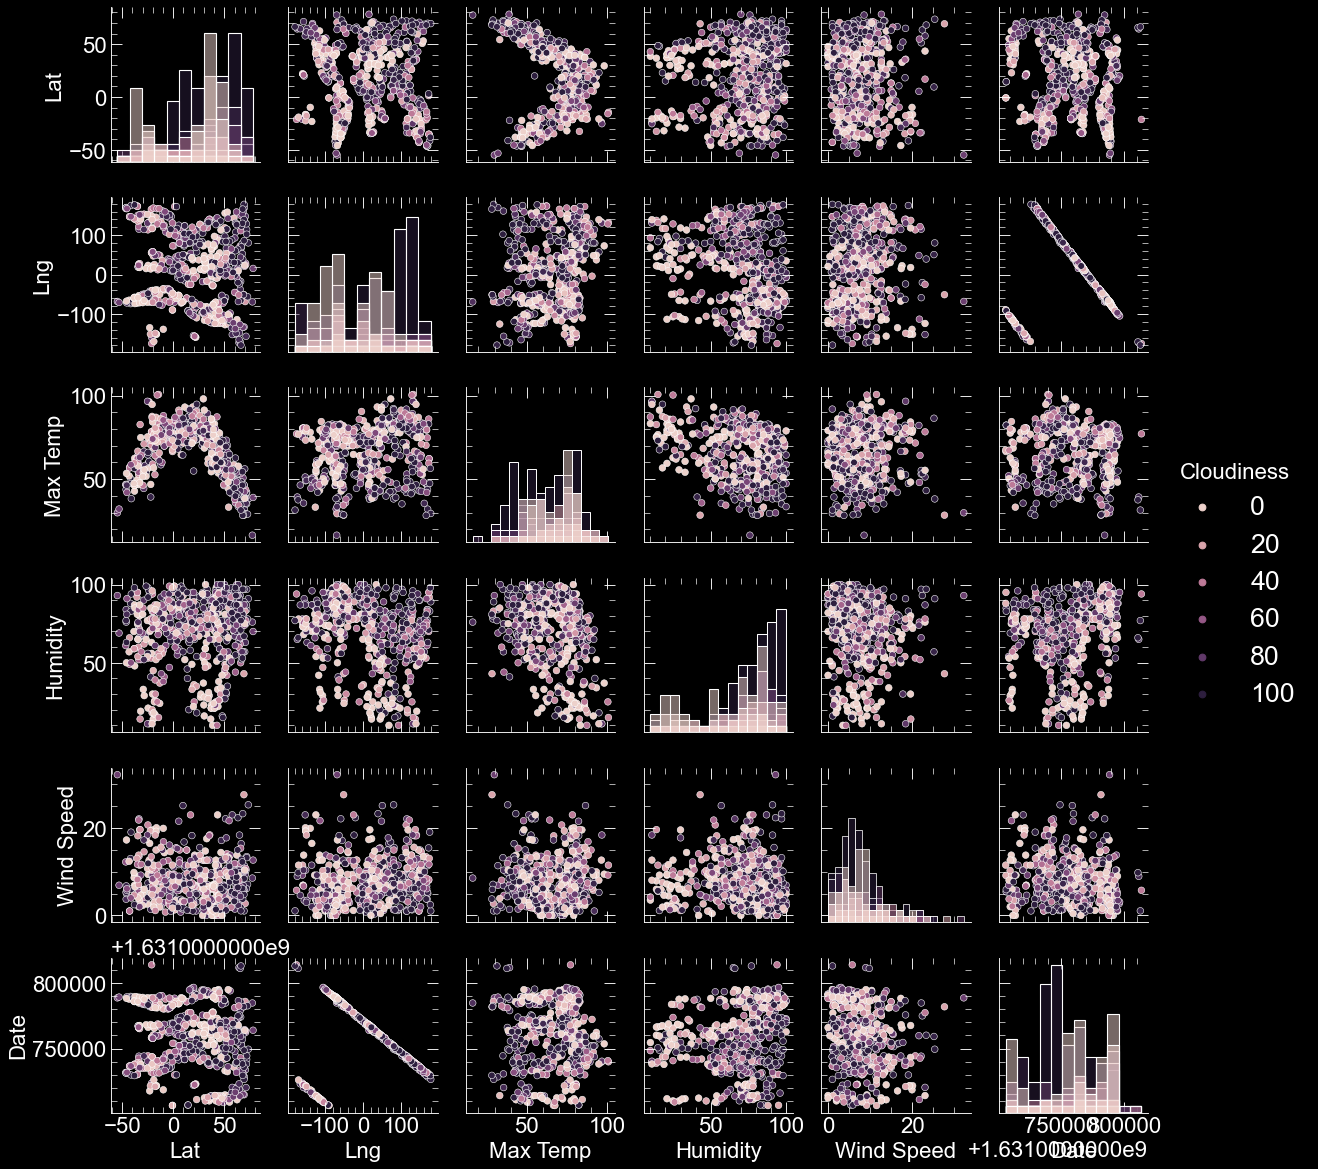

In [145]:
sns.pairplot(city_data, hue='Cloudiness', diag_kind="hist")
plt.show()

## Latitude vs. Temperature, Latitude vs. Cloudness,  Latitude vs. Humidity, Latitude vs. Wind Speed Plot

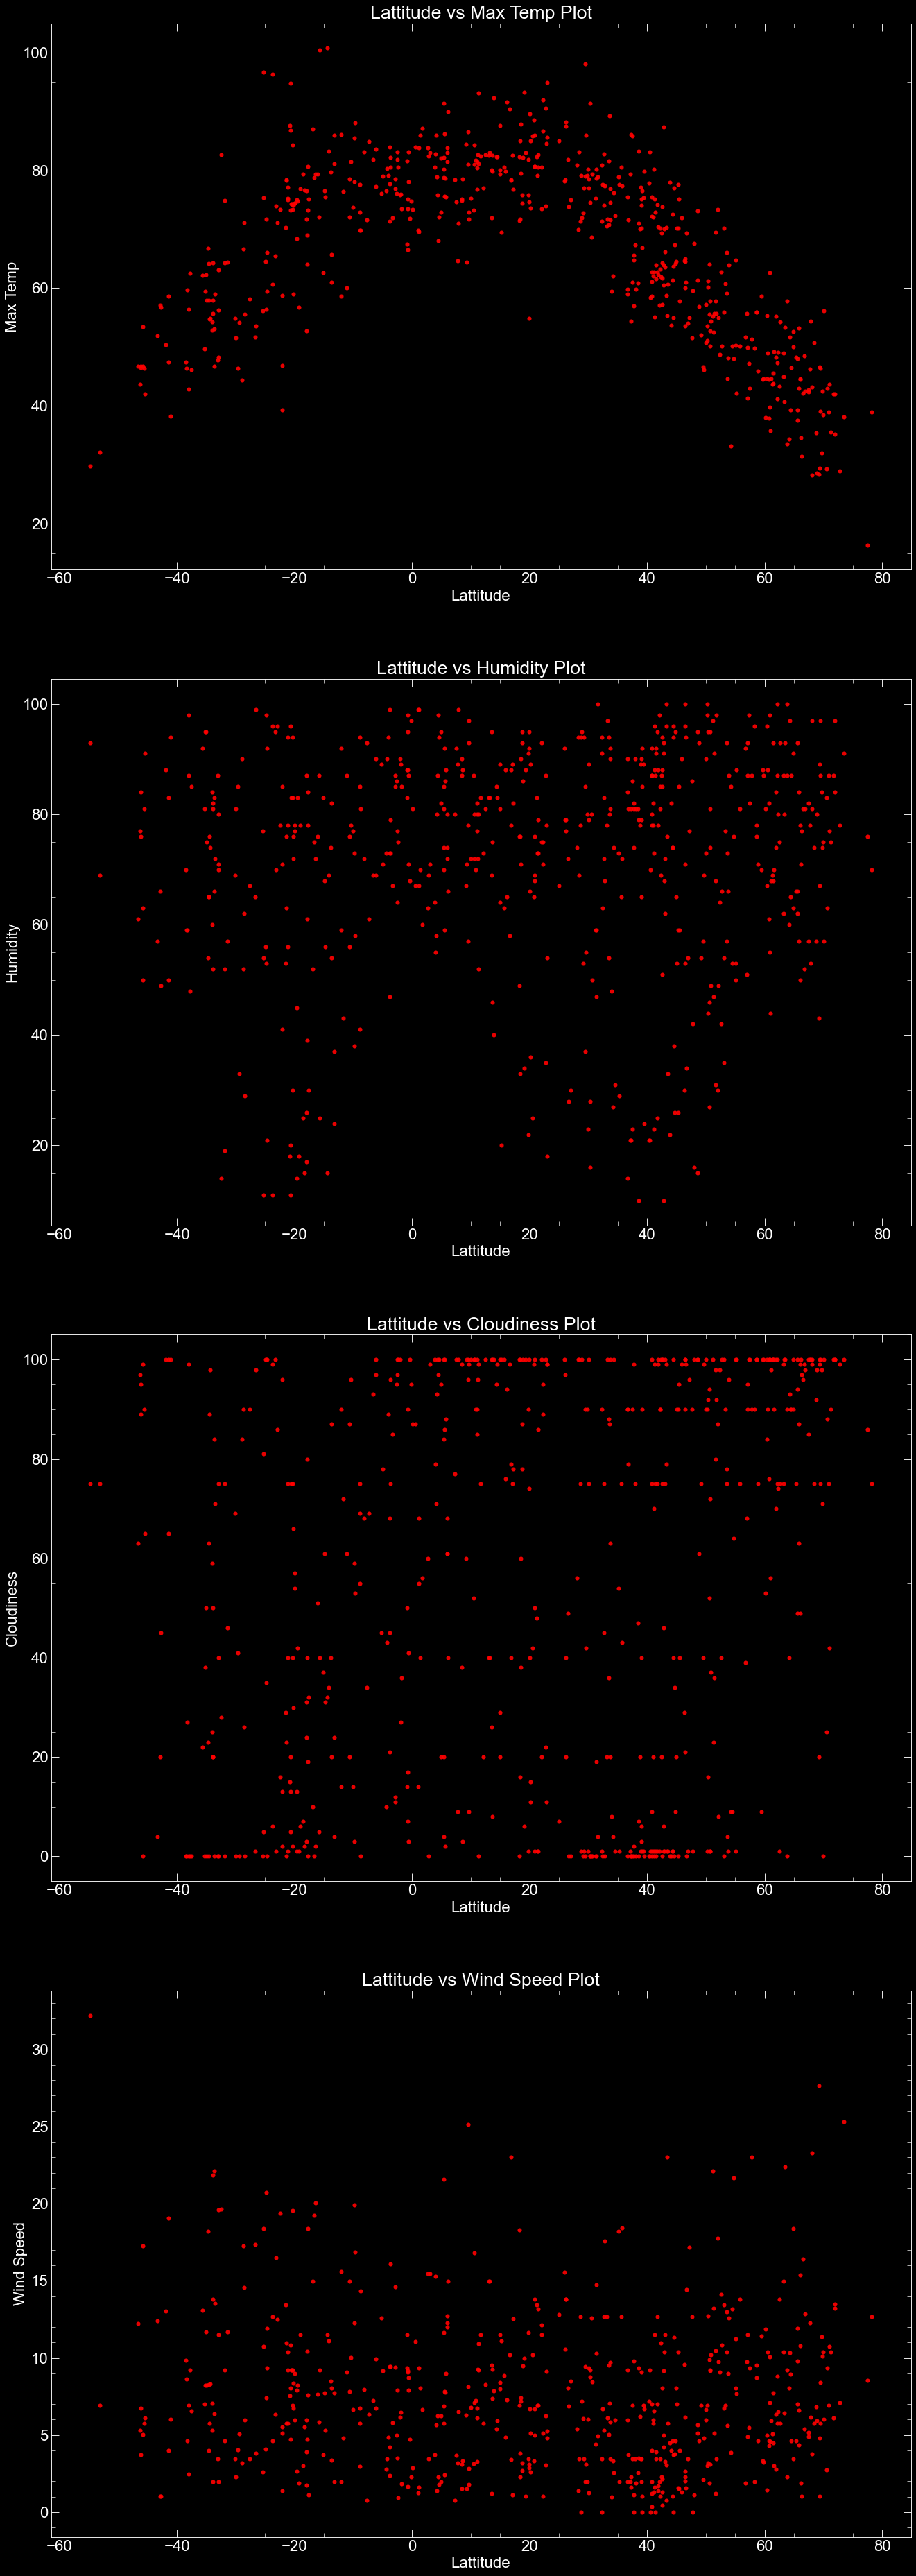

In [135]:
cols=['Max Temp','Humidity','Cloudiness','Wind Speed']
fig = plt.figure(figsize=(20,60))
for i in range(1, 5):
    ax = fig.add_subplot(4, 1, i)
    city_data.plot(kind='scatter', x='Lat',y=cols[i-1],color='red', alpha=0.9, ax=ax)
    ax.set(title=f'Lattitude vs {cols[i-1]} Plot', xlabel='Lattitude')

plt.show()

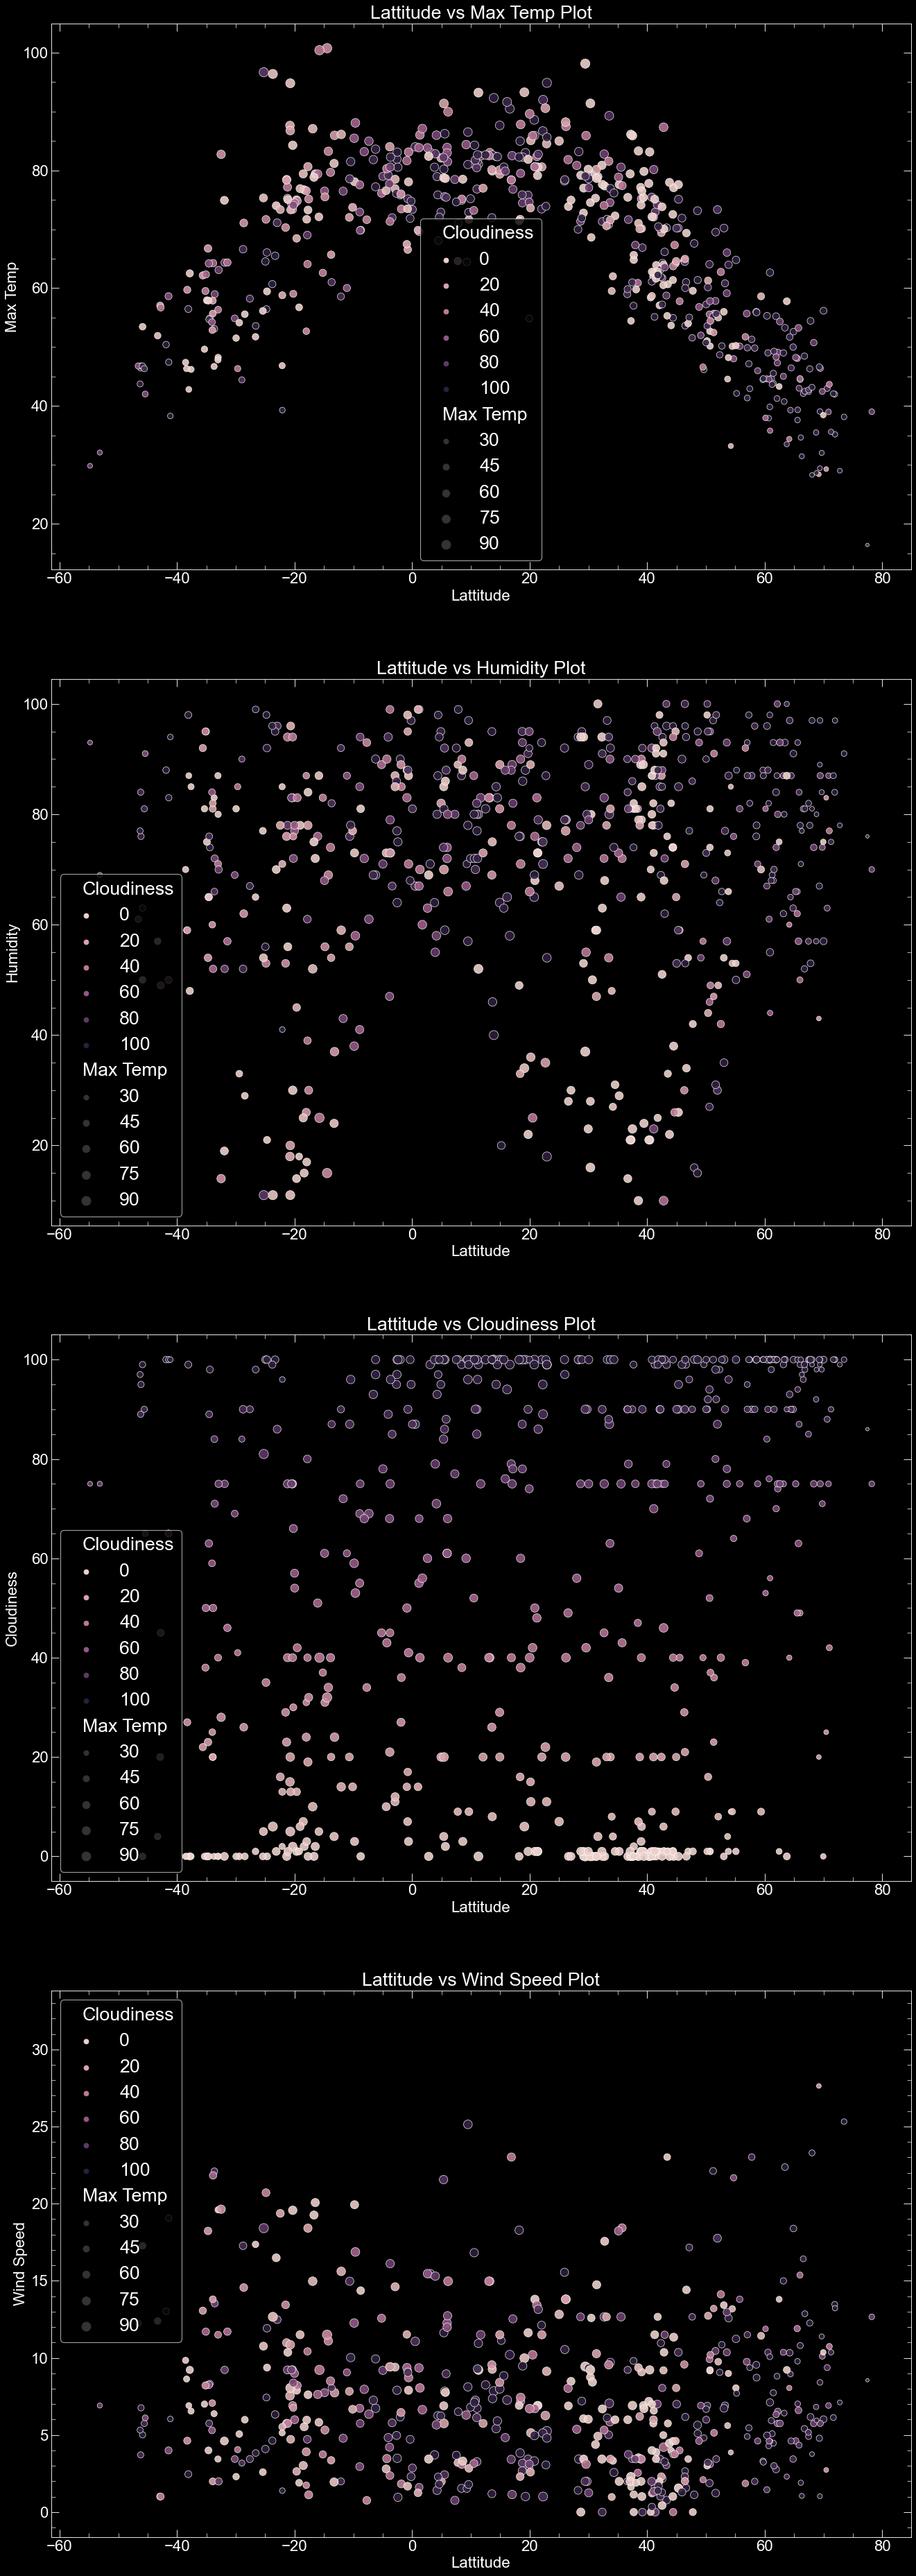

In [136]:
#using seaborn scatter plot with differnt columns for  male and female
cols=['Max Temp','Humidity','Cloudiness','Wind Speed']
fig = plt.figure(figsize=(20,60))
for i in range(1, 5):
    ax = fig.add_subplot(4, 1, i)
    sns.scatterplot(x='Lat',y=cols[i-1],hue='Cloudiness', 
                size='Max Temp',sizes=(20, 150),
                data=city_data,alpha=0.9,ax=ax)
    ax.set(title=f'Lattitude vs {cols[i-1]} Plot', xlabel='Lattitude')

plt.show()


## Linear Regression

In [137]:
corr=city_data.corr()

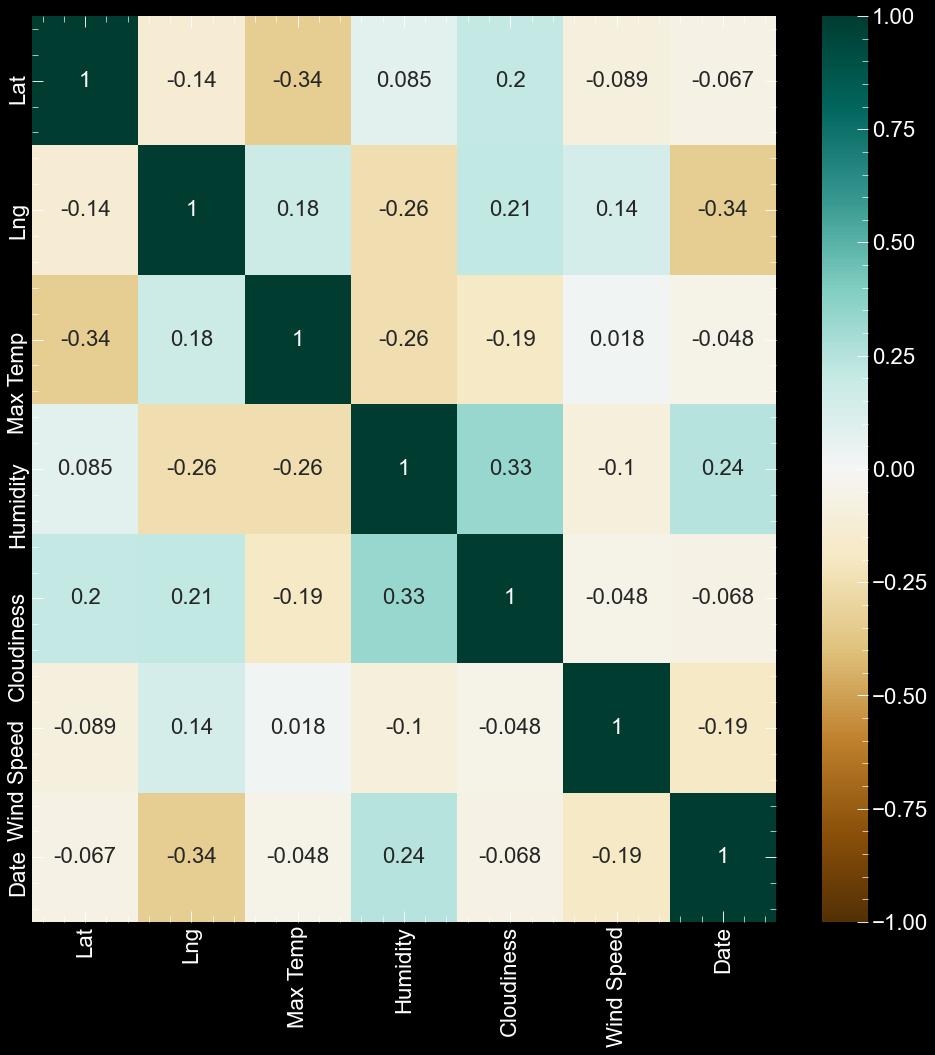

In [139]:
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,vmin=-1, vmax=1, annot=True, ax=ax, cmap='BrBG')
plt.show()

##  Northern Hemisphere 
### 'Max Temp','Humidity','Cloudiness','Wind Speed' vs. 'Latitude'- Linear Regression

The r-squared of Northen Hemisphere- Max Temp Vs. Lattitude is: 0.7090577497714333
The r-squared of Northen Hemisphere- Humidity Vs. Lattitude is: 7.309311141843441e-06
The r-squared of Northen Hemisphere- Cloudiness Vs. Lattitude is: 0.014206868985803187
The r-squared of Northen Hemisphere- Wind Speed Vs. Lattitude is: 0.005041504546615233


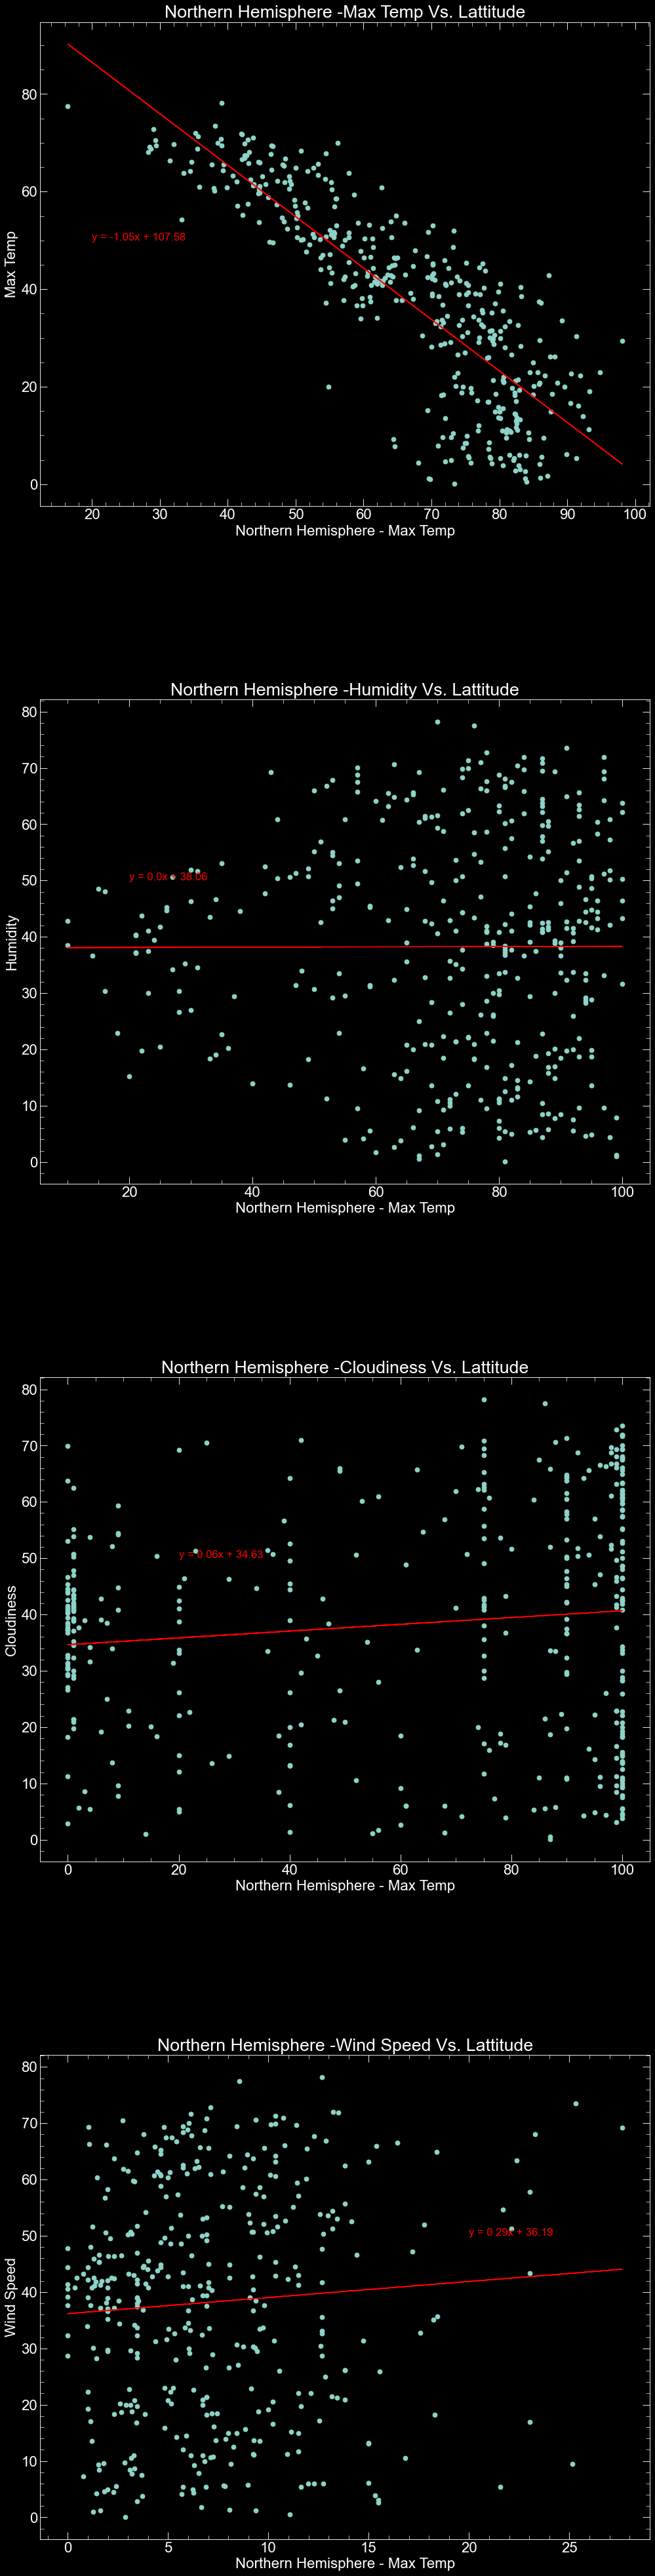

In [141]:
nort_data=city_data[city_data['Lat']>0]
y=nort_data['Lat']
c=['Max Temp','Humidity','Cloudiness','Wind Speed']
cols=[nort_data['Max Temp'],nort_data['Humidity'],nort_data['Cloudiness'],nort_data['Wind Speed']]
fig = plt.figure(figsize=(15,60))
for i in range(1, 5):
    ax = fig.add_subplot(4, 1, i)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(cols[i-1], y)
    regress_values = cols[i-1] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    ax.scatter(cols[i-1],y)
    ax.plot(cols[i-1],regress_values,"r-")
    ax.annotate(line_eq,(20,50),fontsize=15,color="red")
    ax.set_ylabel(f'{c[i-1]}')
    ax.set_xlabel('Northern Hemisphere - Max Temp')
    ax.set_title(f'Northern Hemisphere -{c[i-1]} Vs. Lattitude')
    print(f"The r-squared of Northen Hemisphere- {c[i-1]} Vs. Lattitude is: {rvalue**2}")


fig.subplots_adjust(
                    bottom=0.1, top=0.9,
                    hspace=0.4, wspace=0.4)
plt.show()

##  Southern Hemisphere 
### 'Max Temp','Humidity','Cloudiness','Wind Speed' vs. 'Latitude'- Linear Regression

The r-squared of Southern Hemisphere- Max Temp Vs. Lattitude is: 0.5204930416886129
The r-squared of Southern Hemisphere- Humidity Vs. Lattitude is: 0.004940989550118332
The r-squared of Southern Hemisphere- Cloudiness Vs. Lattitude is: 0.0013112905870241059
The r-squared of Southern Hemisphere- Wind Speed Vs. Lattitude is: 0.019247562300640775


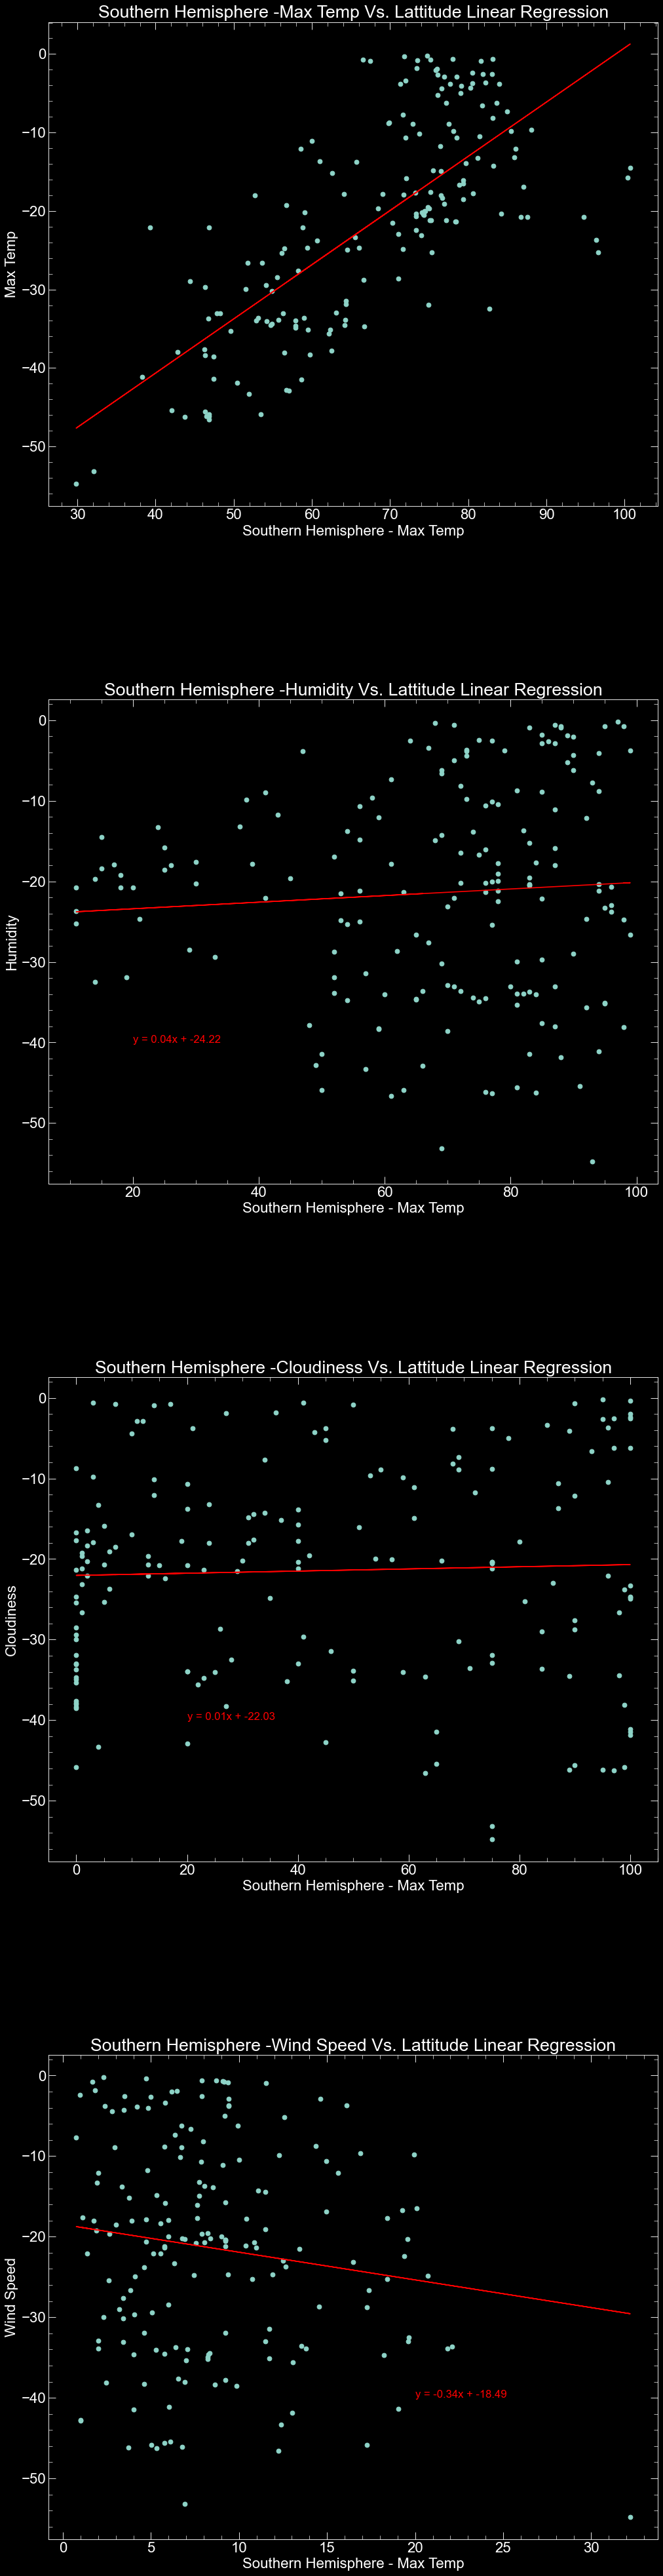

In [143]:
south_data=city_data[city_data['Lat']<0]
y=south_data['Lat']
c=['Max Temp','Humidity','Cloudiness','Wind Speed']
cols=[south_data['Max Temp'],south_data['Humidity'],south_data['Cloudiness'],south_data['Wind Speed']]
fig = plt.figure(figsize=(15,60))
for i in range(1, 5):
    ax = fig.add_subplot(4, 1, i)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(cols[i-1], y)
    regress_values = cols[i-1] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    ax.scatter(cols[i-1],y)
    ax.plot(cols[i-1],regress_values,"r-")
    ax.annotate(line_eq,(20,-40),fontsize=15,color="red")
    ax.set_ylabel(f'{c[i-1]}')
    ax.set_xlabel('Southern Hemisphere - Max Temp')
    ax.set_title(f'Southern Hemisphere -{c[i-1]} Vs. Lattitude Linear Regression')
    print(f"The r-squared of Southern Hemisphere- {c[i-1]} Vs. Lattitude is: {rvalue**2}")

fig.subplots_adjust(
                    bottom=0.1, top=0.9,
                    hspace=0.4, wspace=0.4)
plt.show()
